In [3]:
import pandas as pd
import os

In [ ]:
df = pd.read_csv(os.path.join('data', 'Salary_Data.csv'))
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [7]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Age'].fillna(method='ffill') # ffill = forward fill, bfill = backward fill

/var/folders/z6/szh1pvgx3z1f80q6xbtc8m2c0000gn/T/ipykernel_34117/663825783.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'].fillna(method='ffill') # ffill = forward fill, bfill = backward fill


0       32.0
1       28.0
2       45.0
3       36.0
4       52.0
        ... 
6699    49.0
6700    32.0
6701    30.0
6702    46.0
6703    26.0
Name: Age, Length: 6704, dtype: float64

In [13]:
df['Gender'].isna().sum()

np.int64(2)

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'].isna().sum()

np.int64(0)

In [16]:
df['Education Level'].isna().sum()
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

iloc -> implicit location

In [ ]:
df['Education Level'] = df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor",
    "Bachelor's": "Bachelor",
    "Master's Degree": "Master",
    "Master's": "Master",
    "phD": "PhD"
})
df['Education Level'].value_counts()
df

Education Level
Bachelor       3023
Master         1861
PhD            1369
High School     448
Name: count, dtype: int64

In [34]:
df['Job Title'].isna().sum()
df['Job Title'].value_counts()
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])
df['Job Title'].isna().sum()
df['Job Title'].str.lower()


0           software engineer
1                data analyst
2              senior manager
3             sales associate
4                    director
                ...          
6699    director of marketing
6700          sales associate
6701        financial manager
6702        marketing manager
6703          sales executive
Name: Job Title, Length: 6704, dtype: object

In [ ]:
# Standard Date format
df['Date'] = df
df['Age'] = df['Age'].str.extract('\d+').astype(int)

In [35]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [74]:
df['Age'].std()

np.float64(7.6134965378262915)

In [76]:
# Z - Score Method
# Z = (x - mean) / standard deviation

z = (df['Age'] - df['Age'].mean()) / df['Age'].std()

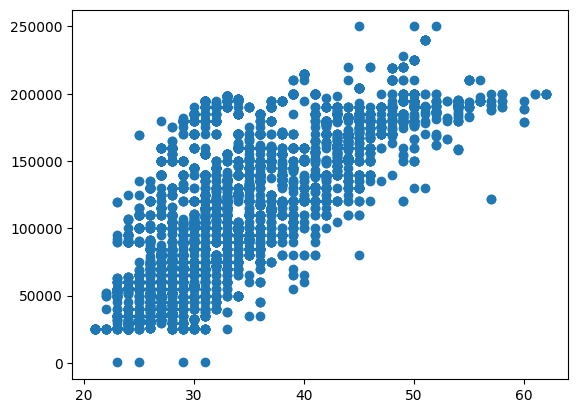

In [39]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['Salary'])

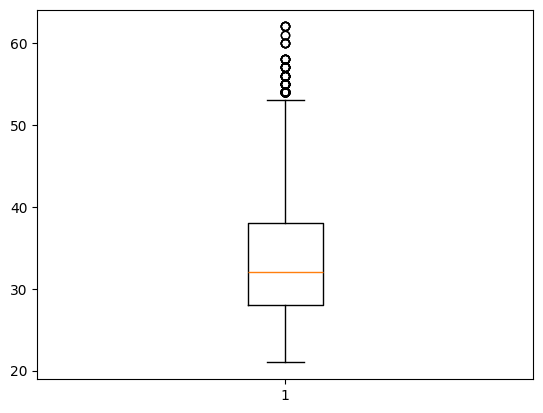

In [ ]:
plt.boxplot(df['Age'])
plt.show()

# Dot points represent the outliers

<Axes: ylabel='Age'>

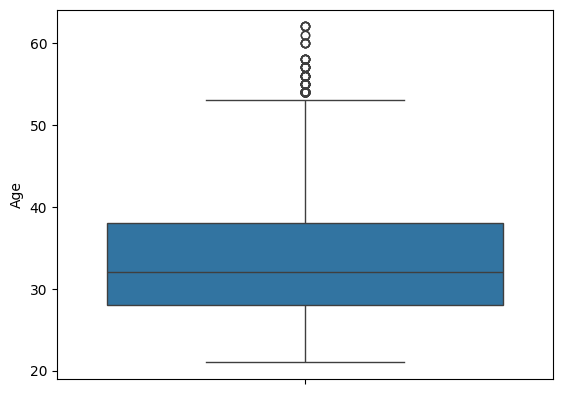

In [44]:
import seaborn as sns

sns.boxplot(df['Age'])

In [52]:
df_numeric = df[['Age', 'Years of Experience', 'Salary']]
df_numeric.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.937655,0.728053
Years of Experience,0.937655,1.000000,0.808969
Salary,0.728053,0.808969,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Years of Experience'}>],
       [<Axes: title={'center': 'Salary'}>, <Axes: >]], dtype=object)

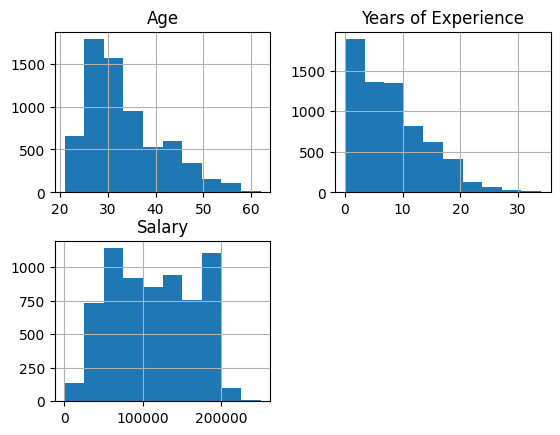

In [60]:
df.hist()

<Axes: >

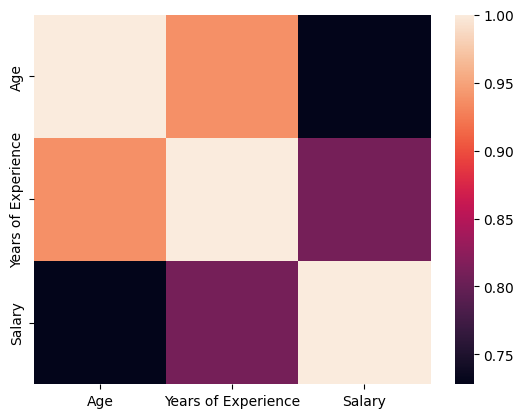

In [73]:
sns.heatmap(df_numeric.corr())

In [72]:
# sns.pairplot(df_numeric)
# sns.boxenplot(df_numeric)
# sns.barplot(df_numeric[['Age', 'Years of Experience']])
# sns.catplot(df_numeric)
# sns.violinplot(df_numeric['Age'])

In [ ]:
df_male = df[(df['Gender'] == 'Male') & (df['Age'] > 30)]

df_male.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
4,52.0,Male,Master,Director,20.0,200000.0
7,31.0,Male,Bachelor,Sales Manager,4.0,80000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0
